In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from morpheus.classifier import Classifier
from morpheus.data import example
%matplotlib inline
import pickle
from astropy.visualization import ZScaleInterval

2023-02-23 09:00:52.440037: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 09:00:52.440117: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 09:00:53.341476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-23 09:00:53.341617: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-23 09:00:53.341634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

# Getting Data H,J,V,z

F160W (H) / F125W (J) / F606W (V) / F850LP (z)

In [2]:
from astropy.io import fits
f115w_nircam_i2d = ('/data/jip/2023-02-06/img/align-image/jw01345-o002_t022_nircam_clear_f115w_aligned.fits')
f150w_nircam_i2d = ('/data/jip/2023-02-06/img/align-image/jw01345-o002_t022_nircam_clear_f150w_aligned.fits')
f200w_nircam_i2d = ('/data/jip/2023-02-06/img/align-image/jw01345-o002_t022_nircam_clear_f200w_aligned.fits')

h, j, v, z = f115w_nircam_i2d, f150w_nircam_i2d, f200w_nircam_i2d, f200w_nircam_i2d

# fits 특성에 따라서 ext 바꿔줘야 
hdat = fits.getdata(h, ext=1)
jdat = fits.getdata(j, ext=1)
vdat = fits.getdata(v, ext=1)
zdat = fits.getdata(z, ext=1)

h_header = fits.getheader(h, ext=1)
j_header = fits.getheader(j, ext=1)
v_header = fits.getheader(v, ext=1)
z_header = fits.getheader(z, ext=1)

# Raw Image Show

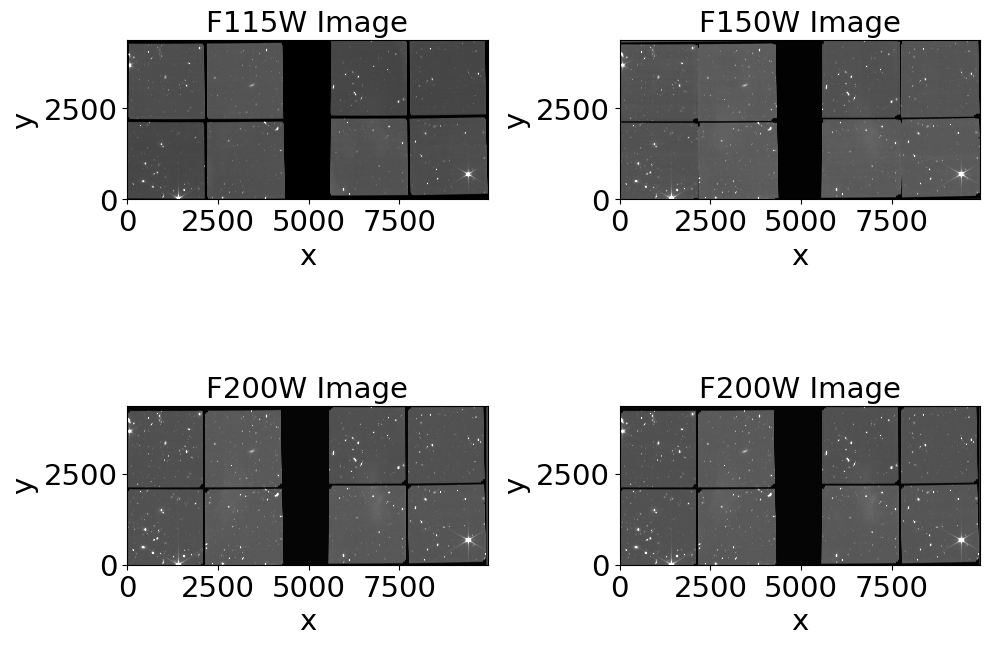

In [3]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hdat, jdat, vdat, zdat], ['F115W', 'F150W', 'F200W', 'F200W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ZInterval = ZScaleInterval()
    vmin, vmax = ZInterval.get_limits(arr)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=vmin, vmax=vmax)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)
    plt.tight_layout()

# Image Cut and Show 

## 1) Given X Y ==> Cut the image


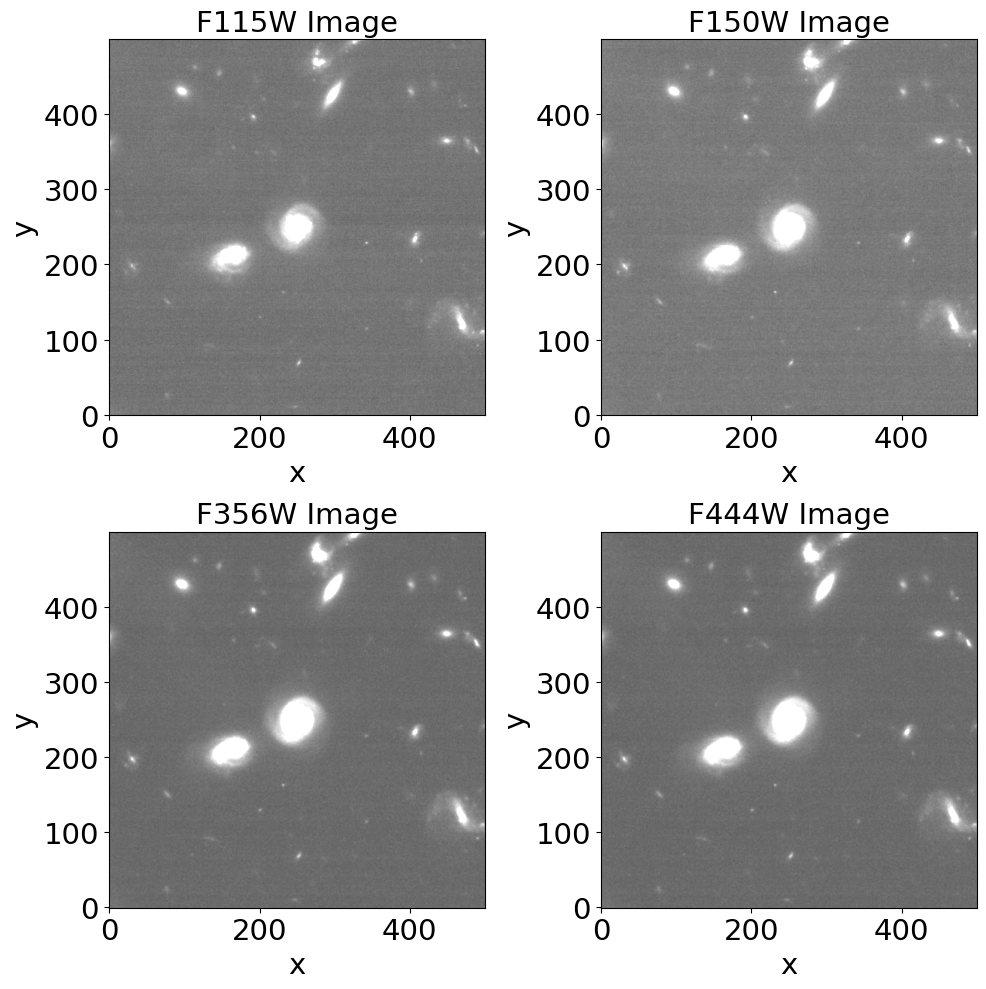

In [4]:
from astropy.nddata import Cutout2D
from astropy import units as u
cutoutposition = (833, 730)
cutoutsize = (500, 500)
hcut = Cutout2D(hdat, cutoutposition, cutoutsize).data
jcut = Cutout2D(jdat, cutoutposition, cutoutsize).data
vcut = Cutout2D(vdat, cutoutposition, cutoutsize).data
zcut = Cutout2D(zdat, cutoutposition, cutoutsize).data
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()

for ax, arr, band in zip(axes, [hcut,jcut,vcut,zcut], ['F115W', 'F150W', 'F356W', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=0, vmax=0.3853037)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()


## 2) Given RA/DEC ==> Cut the image

Set DATE-AVG to '2022-06-21T23:30:42.583' from MJD-AVG.
Set DATE-END to '2022-06-22T00:03:43.515' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.785729 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725461621.089 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T00:41:54.035' from MJD-AVG.
Set DATE-END to '2022-06-22T01:14:35.286' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.795264 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725510974.395 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T01:53:47.550' from MJD-AVG.
Set DATE-END to '2022-06-22T02:27:14.386' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.800090 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725535860.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T02:59:46.731' from MJD-AVG.
Set DATE-END to '2022-06-22T03:26:17.615' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.812393 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725599046.468 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


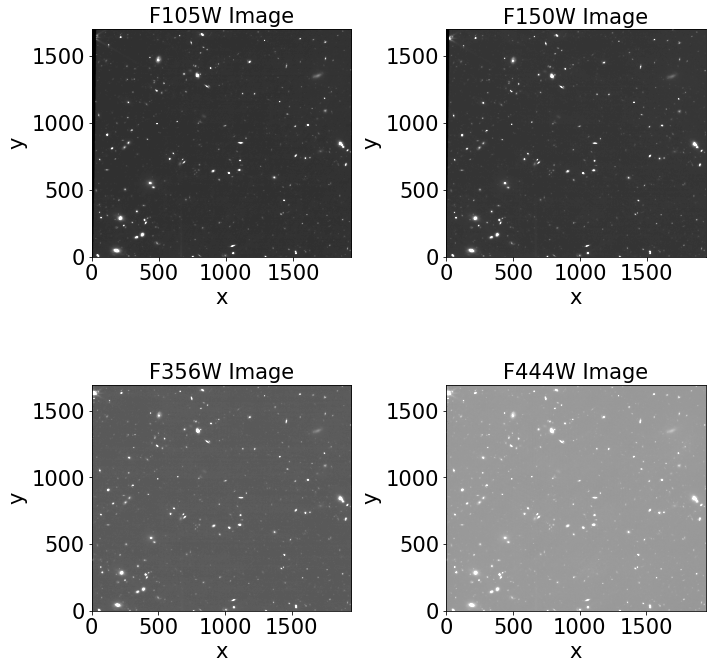

In [ ]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

wcs_h = WCS(h_header)
wcs_j = WCS(j_header)
wcs_v = WCS(v_header)
wcs_z = WCS(z_header)

cutoutposition_radec = [[14, 19, 28], [52, 53, 42]] #RA(hour, min, sec), DEC(deg, min, sec)형식
squarecutpoint_radec =  [[14, 19, 19.023], [52, 53, 41.14]] #RA(hour, min, sec), DEC(deg, min, sec)형식

def skycoord(x):
    ra = (x[0][0]+x[0][1]/60+x[0][2]/3600)*15*u.deg
    dec = (x[1][0]+x[1][1]/60+x[1][2]/3600)*u.deg
    c = SkyCoord(ra, dec)
    #print(c)
    return c

def cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs):
    cutoutposition = np.array(skycoord_to_pixel(skycoord(cutoutposition_radec), wcs))
    squarecutpoint = np.array(skycoord_to_pixel(skycoord(squarecutpoint_radec), wcs))
    #print(cutoutposition)
    #print(squarecutpoint)
    cutoutsize = abs(squarecutpoint-cutoutposition) * 2
    #print(cutoutsize)
    return np.array([cutoutposition, cutoutsize])
    
hcut = Cutout2D(hdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_h)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_h)[1]).data
jcut = Cutout2D(jdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_j)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_j)[1]).data
vcut = Cutout2D(vdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_v)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_v)[1]).data
zcut = Cutout2D(zdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_z)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_z)[1]).data
#jcut = Cutout2D(jdat, cutoutposition, cutoutsize).data
#vcut = Cutout2D(vdat, cutoutposition, cutoutsize).data
#zcut = Cutout2D(zdat, cutoutposition, cutoutsize).data

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut,jcut,vcut,zcut], ['F105W', 'F150W', 'F356W', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=-0, vmax=0.38530371)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()

### image resizing for Morpheus (same size로) --> 추후 반드시 해결할 것 PIL VS cv2 

In [68]:
from PIL import Image
import cv2 

hcut_resize = cv2.resize(hcut, dsize=np.shape(hcut), interpolation=cv2.INTER_NEAREST)
jcut_resize = cv2.resize(jcut, dsize=(np.shape(hcut)))
vcut_resize = cv2.resize(vcut, dsize=(np.shape(hcut)))
zcut_resize = cv2.resize(zcut, dsize=(np.shape(hcut)))



/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:479: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:480: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:505: RuntimeWarning: overflow encountered in add
  A_resampled += a_min


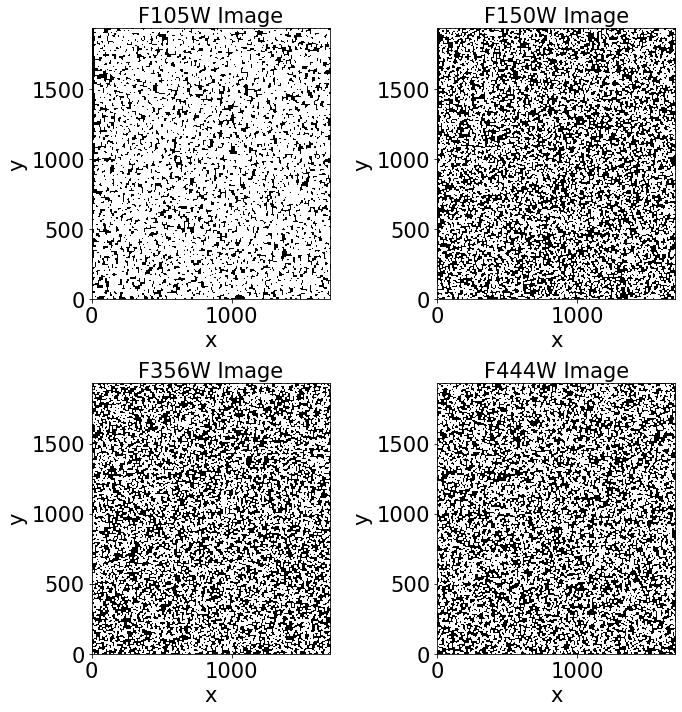

In [67]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut_resize,jcut_resize,vcut_resize,zcut_resize], ['F105W', 'F150W', 'F356W', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray')#,  vmin=0, vmax=0.38530371)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()

# Running Morpheus

In [5]:
classified = Classifier.classify(h=hcut, j=jcut, v=vcut, z=zcut)

# the mask tells the segmentation mapping algorithm to ignore
# the areas unclassified as a result of the windowing classification
# method used.
mask = np.zeros_like(hcut, np.int)
mask[5:-5, 5:-5] = 1
segmap = Classifier.segmap_from_classified(classified, hcut, mask=mask)

catalog = Classifier.catalog_from_classified(classified, hcut, segmap)

rgb = Classifier.colorize_classified(classified)


classifying:   0%|          | 0/212 [00:00<?, ?batch/s]/home/jip/Downloads/yes/lib/python3.9/site-packages/morpheus/core/unet.py:143: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  return LAYERS.batch_normalization(inputs, training=is_training, axis=axis)
/home/jip/Downloads/yes/lib/python3.9/site-packages/morpheus/core/unet.py:162: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  inputs = LAYERS.conv2d(
/home/jip/Downloads/yes/lib/python3.9/site-packages/morpheus/core/unet.py:149: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  return LAYERS.dropout(inputs,

Building Markers...
Watershedding...


100%|██████████| 500/500 [00:00<00:00, 1164.69it/s]


# Saving Morpheus Classified Result to Pickle

Once calculation is done to here, don't need to calculate again.

In [53]:
# save with it 
with open("classified_result_ellipse2.pickle","wb") as f:
    pickle.dump(classified, f)

In [54]:
# load with it
with open("classified_result_ellipse2.pickle","rb") as fi:
    classified = pickle.load(fi)

# Colorizing Result

100%|██████████| 500/500 [00:00<00:00, 1041.78it/s]


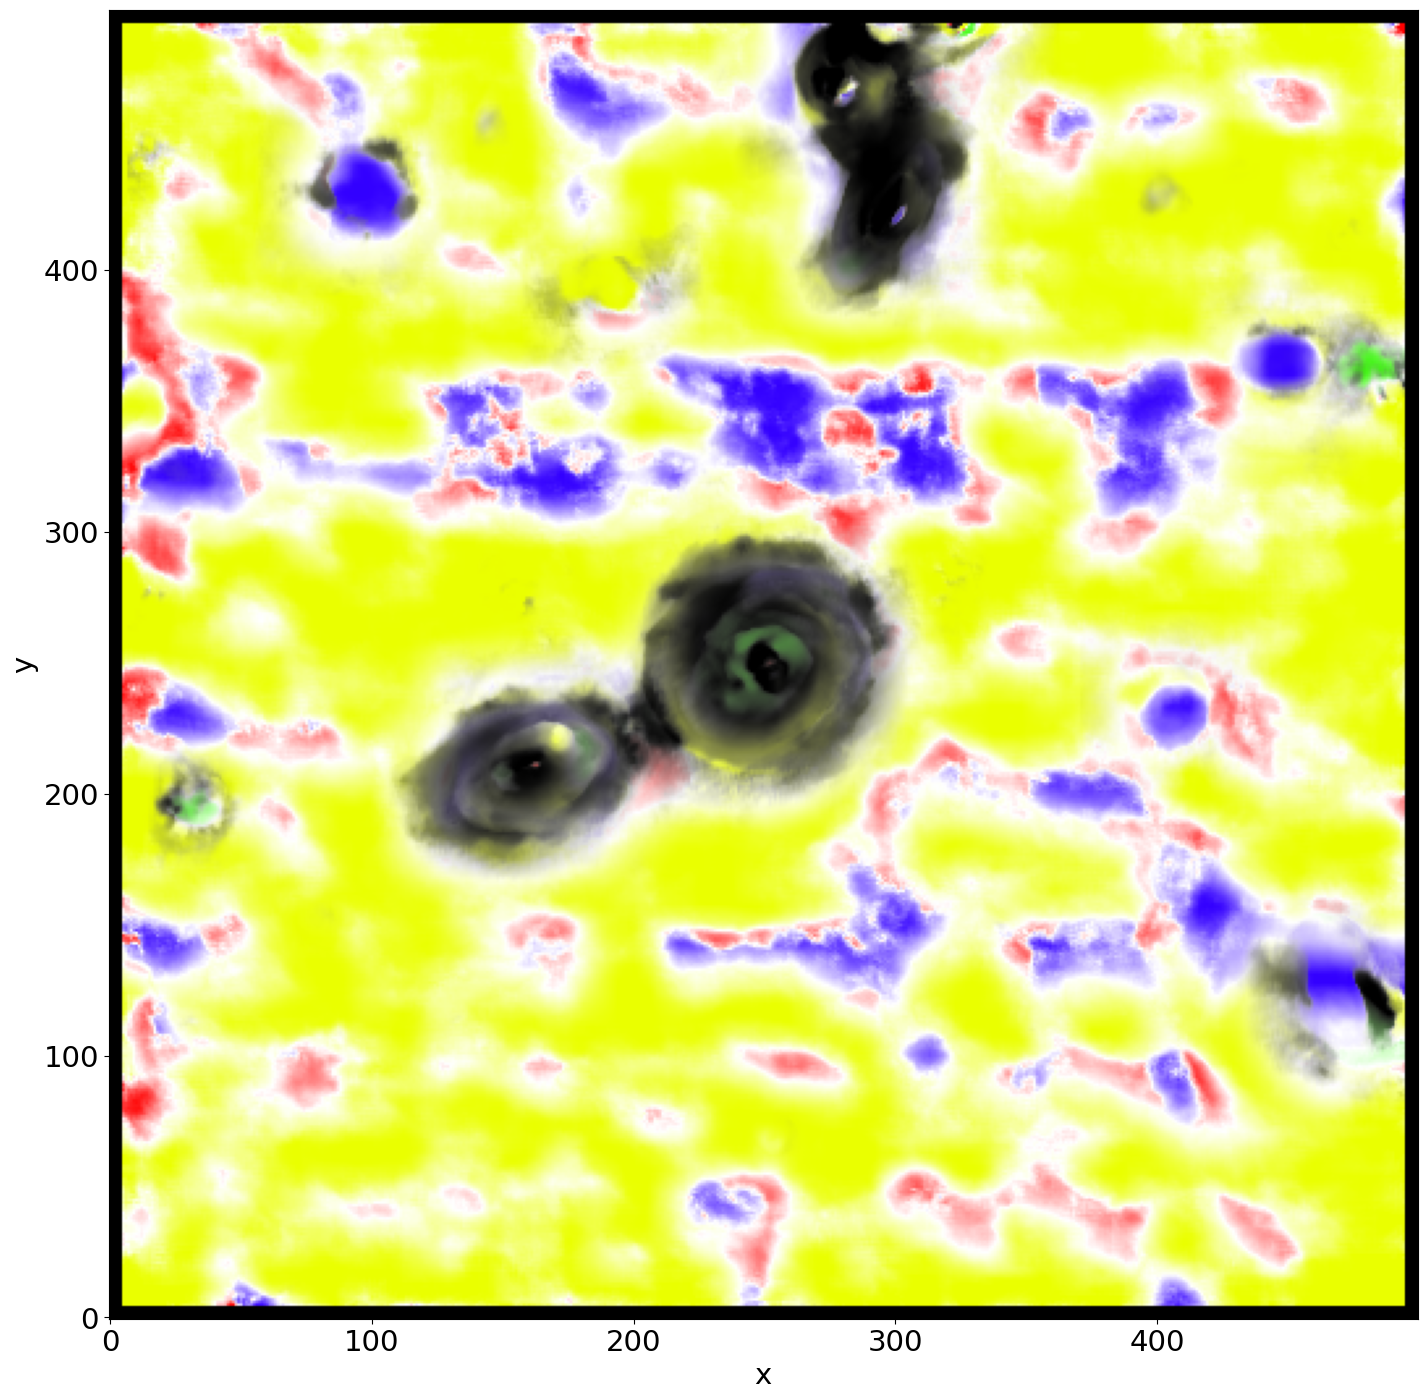

In [6]:
rgb = Classifier.colorize_classified(classified)

plt.figure(figsize=(17, 17))
plt.xlabel('x', fontsize=21)
plt.ylabel('y', fontsize=21)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.imshow(rgb, origin='lower')
plt.show()

# Saving Result to Dataframe, CSV

In [56]:
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs import WCS

wcs = WCS(h_header)

morpheus_result = pd.DataFrame(catalog)
morpheus_result['ra'] = pd.Series(dtype='float')
morpheus_result['dec'] = pd.Series(dtype='float')
morpheus_result['x'] = pd.Series(dtype='float')
morpheus_result['y'] = pd.Series(dtype='float')
morpheus_result['p_sph'] = pd.Series(dtype='float')
morpheus_result['p_disk'] = pd.Series(dtype='float')
morpheus_result['p_irr'] = pd.Series(dtype='float')
morpheus_result['p_ps'] = pd.Series(dtype='float')

for i in range(np.size(morpheus_result['ra'])):
    morpheus_result['x'][i] = morpheus_result['location'][i][1]
    morpheus_result['y'][i] = morpheus_result['location'][i][0]
    morpheus_result['p_sph'][i] = morpheus_result['morphology'][i][0]
    morpheus_result['p_disk'][i] = morpheus_result['morphology'][i][1]
    morpheus_result['p_irr'][i] = morpheus_result['morphology'][i][2]
    morpheus_result['p_ps'][i] = morpheus_result['morphology'][i][3]
   
morpheus_result['real_x'] = morpheus_result['x']+(cutoutposition[0]-cutoutsize[0]/2)
morpheus_result['real_y'] = morpheus_result['y']+(cutoutposition[1]-cutoutsize[1]/2)

for i in range(np.size(morpheus_result['ra'])):
    morpheus_result['ra'][i] = pixel_to_skycoord(morpheus_result['real_x'][i], morpheus_result['real_y'][i], wcs).ra.degree
    morpheus_result['dec'][i] = pixel_to_skycoord(morpheus_result['real_x'][i], morpheus_result['real_y'][i], wcs).dec.degree


Set DATE-AVG to '2022-06-22T00:06:18.287' from MJD-AVG.
Set DATE-END to '2022-06-22T01:14:35.286' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.795264 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725510974.395 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/tmp/ipykernel_38996/2421671279.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpheus_result['x'][i] = morpheus_result['location'][i][1]
/tmp/ipykernel_38996/2421671279.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpheus_result['y'][i] = morpheus_result['location'][i][0]
/tmp/ipykernel_38996/2421671279.py:19: SettingWithCopyWarning: 
A value is trying to be 

In [57]:
import os 
# os.makedirs("./output")
morpheus_result.to_csv("./morpheus_result.csv")

# Filtering High-Probabilithy Disk Candidates

In [58]:
datmor = pd.DataFrame(pd.read_csv("morpheus_result.csv"))
datmor_highdisk=datmor.loc[datmor['p_disk'] > 0.5]
datmor_highdisk

,Unnamed: 0,id,location,morphology,ra,dec,x,y,p_sph,p_disk,p_irr,p_ps,real_x,real_y
0,0,1,"[7, 59]","[0.1640765551692324, 0.8359234448307676, 0.0, ...",214.877031,52.884155,59.0,7.0,0.164077,0.835923,0.000000,0.000000,1519.0,3467.0
1,1,2,"[5, 209]","[0.3254549131285248, 0.6745450868714752, 0.0, ...",214.878407,52.885162,209.0,5.0,0.325455,0.674545,0.000000,0.000000,1669.0,3465.0
2,2,3,"[72, 265]","[0.16232171901242648, 0.7741164483157513, 0.00...",214.879666,52.885157,265.0,72.0,0.162322,0.774116,0.001784,0.061778,1725.0,3532.0
3,3,4,"[34, 28]","[0.4943633269167945, 0.5026579787469765, 0.002...",214.877039,52.883798,28.0,34.0,0.494363,0.502658,0.002979,0.000000,1488.0,3494.0
4,4,5,"[76, 179]","[0.28975120994662856, 0.7102487900533714, 0.0,...",214.878908,52.884564,179.0,76.0,0.289751,0.710249,0.000000,0.000000,1639.0,3536.0
5,5,6,"[197, 83]","[0.2522099221571939, 0.7326998894994186, 0.000...",214.879345,52.883246,83.0,197.0,0.252210,0.732700,0.000777,0.014313,1543.0,3657.0
6,6,8,"[226, 493]","[0.10481869610371657, 0.8951813038962835, 0.0,...",214.883486,52.885805,493.0,226.0,0.104819,0.895181,0.000000,0.000000,1953.0,3686.0
7,7,9,"[259, 494]","[0.24445466834156385, 0.7555453316584362, 0.0,...",214.883858,52.885626,494.0,259.0,0.244455,0.755545,0.000000,0.000000,1954.0,3719.0
8,8,10,"[293, 383]","[0.36126526508712353, 0.6385621922659291, 0.00...",214.883198,52.884698,383.0,293.0,0.361265,0.638562,0.000173,0.000000,1843.0,3753.0
9,9,11,"[314, 47]","[0.19219606511639165, 0.8078039348836084, 0.0,...",214.880297,52.882349,47.0,314.0,0.192196,0.807804,0.000000,0.000000,1507.0,3774.0


# Plotting detected sources on image and colormap

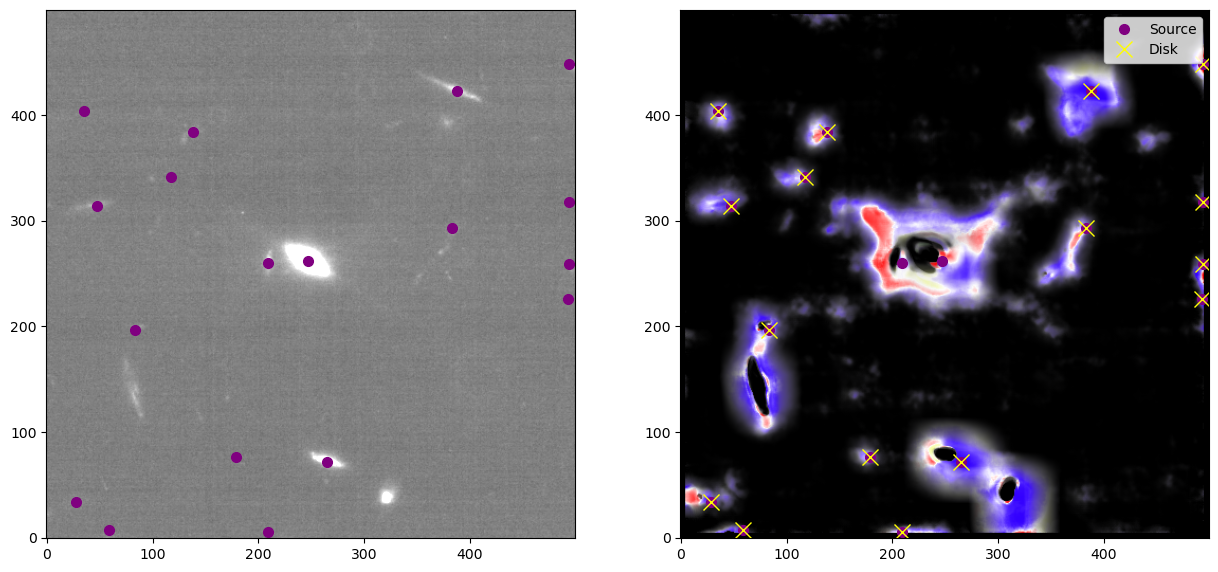

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(hcut, origin='lower', cmap='gray',  vmin=0, vmax=0.38)
axs[0].plot(datmor['x'], datmor['y'], 'o', ms=7, color='purple')
axs[1].imshow(rgb, origin='lower')
axs[1].plot(datmor['x'], datmor['y'], 'o', ms=7, color='purple', label='Source')
axs[1].plot(datmor_highdisk['x'], datmor_highdisk['y'], 'x', ms=12, color='yellow', label='Disk')
axs[1].legend()


Red = Spheroid <br>
Blue = Disk <br>
Green = Irregular <br>
Yellow = Point Source (compact) <br>
Back = Background <br>
White = Can't Classify (two class prob is so similar) <br>